## Import Modules

In [1]:
!pip install surprise

     |████████████████████████████████| 771 kB 2.6 MB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-macosx_10_9_x86_64.whl size=1147491 sha256=d10f2932f0389e2aa2d4ef4ef2dd28045360c80c34777d5630059f4deedc2e9d
  Stored in directory: /Users/saisrinivaslakkakula/Library/Caches/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [2]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
# import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## Data Import

In [3]:
## Importing data
reviews = pd.read_csv('./Clean_data_files/California_reviews_c.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
users = pd.read_csv('./Clean_data_files/CA_users_c.csv', usecols= ['user_id', 'is_elite'])

## Elite Reviews Only

In [4]:
elite_reviews_df = reviews.merge(users, how='left', on=['user_id'], indicator=True)
elite_reviews_df.shape

(53562, 6)

In [5]:
elite_reviews_df = elite_reviews_df.loc[elite_reviews_df['is_elite'] == True]
elite_reviews_df.shape

(2042, 6)

In [6]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, business id and stars (in that order).
data = Dataset.load_from_df(elite_reviews_df[['user_id', 'business_id', 'stars']], reader)

## User Based

### 3 Split

##### KNNBasic

In [7]:
KNNBasic_algorithms_UserBased_3Split=[]
KNNBasic_RMSE_scores_UserBased_3Split=[]

In [8]:
## Fit the model with 3 splits
kf = KFold(n_splits=3)
algo = KNNBasic()
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Msd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))



Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7876
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7129
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7445


In [9]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7034
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6974
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7705


In [ ]:
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 30,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Cosine')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0267
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0291
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0366


In [10]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Cosine_sgd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9984
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0188
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0158


In [11]:
from surprise import KNNBasic
sim_options = {'name': 'msd',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Msd_Sgd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7553
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7769
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7131


In [12]:
KNNBasic_algorithms_UserBased_3Split

['Msd', 'Pearson_baseline', 'Cosine_sgd', 'Msd_Sgd']

In [13]:
KNNBasic_RMSE_scores_UserBased_3Split

[0.7128887759630065,
 0.6973582075531454,
 0.9983547132279544,
 0.7131084290313077]

##### KNNwithMeans

In [14]:
KNNwithMeans_RMSE_scores_UserBased_3Split=[]
KNNwithMeans_algorithms_UserBased_3Split=[]

In [15]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithMeans_algorithms_UserBased_3Split.append('Cosine')
KNNwithMeans_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7620
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6426
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7410


In [16]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithMeans_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNwithMeans_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6310
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6778
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5811


In [17]:
KNNwithMeans_RMSE_scores_UserBased_3Split

[0.6426069885556632, 0.5810982970859652]

##### KNNwithBaseline

In [18]:
KNNwithBaseline_algorithms_UserBased_3Split=[]
KNNwithBaseline_RMSE_scores_UserBased_3Split=[]

In [19]:
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithBaseline_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNwithBaseline_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4875
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5944
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6086


In [20]:
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithBaseline_algorithms_UserBased_3Split.append('Cosine')
KNNwithBaseline_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0207
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1088
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0590


In [21]:
KNNwithBaseline_algorithms_UserBased_3Split

['Pearson_baseline', 'Cosine']

In [22]:
KNNwithBaseline_RMSE_scores_UserBased_3Split

[0.48752264176531446, 1.0207302862743464]

### 5 Split

##### KNNBasic

In [23]:
KNNBasic_algorithms_UserBased_5Split=[]
KNNBasic_RMSE_scores_UserBased_5Split=[]


In [24]:
## Fit the model with 5 splits

kf = KFold(n_splits=5)
algo = KNNBasic()
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Msd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6328
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6874
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5506
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7005
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6674


In [25]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6250
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7100
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5842
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7231
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6144


In [26]:
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 30,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Cosine')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9332
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9531
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0288
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9925
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9682


In [27]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Cosine_sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9691
RMSE: 0.9691
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0601
RMSE: 1.0601
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9015
RMSE: 0.9015
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9657
RMSE: 0.9657
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9967
RMSE: 0.9967


In [28]:
from surprise import KNNBasic
sim_options = {'name': 'msd',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Msd_Sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5971
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7626
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5669
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6398
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7234


In [29]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('pearson_baseline_sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6927
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7024
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7369
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.7425
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6573


In [30]:
KNNBasic_algorithms_UserBased_5Split

['Msd',
 'Pearson_baseline',
 'Cosine',
 'Cosine_sgd',
 'Msd_Sgd',
 'pearson_baseline_sgd']

In [31]:
KNNBasic_RMSE_scores_UserBased_5Split

[0.5506160547862633,
 0.5841596025383011,
 0.9331991284104579,
 0.9014712857825037,
 0.5668878202521498,
 0.6572908454151282]

##### KNNWithMeans

In [32]:
KNNWithMeans_algorithms_UserBased_5Split=[]
KNNWithMeans_RMSE_scores_UserBased_5Split=[]

In [33]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_UserBased_5Split.append('Cosine')
KNNWithMeans_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6423
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5276
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7098
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6901
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6217


In [34]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNWithMeans_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5084
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4903
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6269
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5961
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5414


In [35]:
KNNWithMeans_algorithms_UserBased_5Split

['Cosine', 'Pearson_baseline']

In [36]:
KNNWithMeans_RMSE_scores_UserBased_5Split

[0.5276459118056426, 0.49029542592320563]

##### KNNBaseline

In [37]:
KNNBaseline_algorithms_UserBased_5Split=[]
KNNBaseline_RMSE_scores_UserBased_5Split=[]

In [38]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNBaseline_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5614
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5157
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5154
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4776
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4969


In [39]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_UserBased_5Split.append('Cosine')
KNNBaseline_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9909
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9893
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0033
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0493
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9847


In [40]:
KNNBaseline_algorithms_UserBased_5Split

['Pearson_baseline', 'Cosine']

In [41]:
KNNBaseline_RMSE_scores_UserBased_5Split

[0.477578355810125, 0.9847446932528728]

## Item Based

### 3-Split

##### KNNBasic

In [42]:
KNNBasic_algorithms_ItemBased_3Split=[]
KNNBasic_RMSE_scores_ItemBased_3Split=[]

In [43]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6166
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6744
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6012


In [44]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('cosine')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7053
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7217
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6420


In [45]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('cosine_sgd')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6754
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6736
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7089


In [46]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('pearson_basline_sgd')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6659
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6464
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5948


In [47]:
KNNBasic_algorithms_ItemBased_3Split

['pearson_baseline', 'cosine', 'cosine_sgd', 'pearson_basline_sgd']

In [48]:
KNNBasic_RMSE_scores_ItemBased_3Split

[0.6012249115802235,
 0.6420293757814479,
 0.6736388696164141,
 0.5948432863414794]

##### KNNWithmeans

In [49]:
KNNWithMeans_algorithms_ItemBased_3Split=[]
KNNWithMeans_RMSE_scores_ItemBased_3Split=[]

In [50]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_3Split.append('cosine')
KNNWithMeans_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7114
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7364
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6142


In [51]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNWithMeans_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5537
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5034
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6734


In [52]:
KNNWithMeans_algorithms_ItemBased_3Split

['cosine', 'pearson_baseline']

In [53]:
KNNWithMeans_RMSE_scores_ItemBased_3Split

[0.6141968246981869, 0.5034438565905788]

##### KNNBaseline

In [54]:
KNNBaseline_algorithms_ItemBased_3Split=[]
KNNBaseline_RMSE_scores_ItemBased_3Split=[]

In [55]:
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
    
KNNBaseline_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNBaseline_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6957
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5717
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6417


In [56]:
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_3Split.append('cosine')
KNNBaseline_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6484
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6661
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7195


In [57]:
KNNBaseline_algorithms_ItemBased_3Split

['pearson_baseline', 'cosine']

In [58]:
KNNBaseline_RMSE_scores_ItemBased_3Split

[0.5717441046307216, 0.6484440906707144]

### 5-Split

##### KNNBasic

In [59]:
KNNBasic_algorithms_ItemBased_5Split=[]
KNNBasic_RMSE_scores_ItemBased_5Split=[]

In [60]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5465
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4651
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5464
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4634
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4867


In [61]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('cosine')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5376
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5914
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6967
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5662
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6662


In [62]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('cosine_sgd')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5800
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5808
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6739
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6341
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6064


In [63]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }

bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('pearson_baseline_sgd')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5465
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5008
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5271
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4558
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5317


In [64]:
KNNBasic_algorithms_ItemBased_5Split

['pearson_baseline', 'cosine', 'cosine_sgd', 'pearson_baseline_sgd']

In [65]:
KNNBasic_RMSE_scores_ItemBased_5Split

[0.4633614108605637,
 0.5376260638458921,
 0.5800068572045908,
 0.45580662755720847]

##### KNNWithMeans

In [66]:
KNNWithMeans_algorithms_ItemBased_5Split=[]
KNNWithMeans_RMSE_scores_ItemBased_5Split=[]

In [67]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_5Split.append('cosine')
KNNWithMeans_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6082
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.4449
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6405
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5493
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5519


In [68]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNWithMeans_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4063
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5993
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5250
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.3871
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.5000


In [69]:
KNNWithMeans_algorithms_ItemBased_5Split

['cosine', 'pearson_baseline']

In [70]:
KNNWithMeans_RMSE_scores_ItemBased_5Split

[0.4448754156593909, 0.3871309483481778]

##### KNNBaseline

In [71]:
KNNBaseline_algorithms_ItemBased_5Split=[]
KNNBaseline_RMSE_scores_ItemBased_5Split=[]

In [72]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNBaseline_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4280
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4624
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4685
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.4519
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.3842


In [73]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_5Split.append('cosine')
KNNBaseline_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5287
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6487
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5455
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5358
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5410


In [74]:
KNNBaseline_algorithms_ItemBased_5Split

['pearson_baseline', 'cosine']

In [75]:
KNNBaseline_RMSE_scores_ItemBased_5Split

[0.38423059553137007, 0.5287380813581491]

## Best Parameters using Grid Search

### Grid Search with KNNBasic

In [76]:
from surprise.model_selection import GridSearchCV

In [77]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [78]:
from surprise import KNNBasic
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity ma

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estima

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done comput

### Grid Search with KNNWithMeans

In [79]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [80]:
from surprise import KNNWithMeans
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done comput

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity m

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

### Grid Search with KNNBaseline

In [81]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNBaseline
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

## KNN RMSE PLOTS

### KNN Basic (User Based)

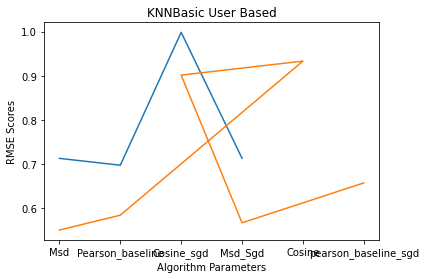

In [83]:
import matplotlib.pyplot as plt
plt.plot(KNNBasic_algorithms_UserBased_3Split, KNNBasic_RMSE_scores_UserBased_3Split)
plt.plot(KNNBasic_algorithms_UserBased_5Split, KNNBasic_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBasic User Based")
plt.savefig('./Images/KNNBasic_User_Based.png')
plt.show()



### KNNBasic Item Based

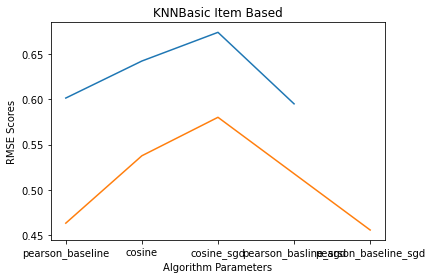

In [85]:
plt.plot(KNNBasic_algorithms_ItemBased_3Split, KNNBasic_RMSE_scores_ItemBased_3Split)
plt.plot(KNNBasic_algorithms_ItemBased_5Split, KNNBasic_RMSE_scores_ItemBased_5Split)

plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBasic Item Based")
plt.savefig('./Images/KNNBasic_Item_Based.png')
plt.show()


### KNNWithMeans UserBased

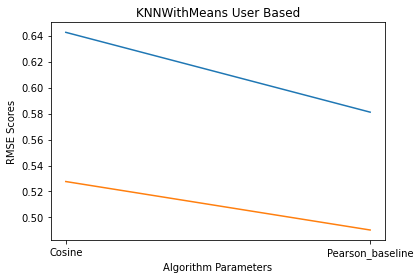

In [86]:
plt.plot(KNNwithMeans_algorithms_UserBased_3Split, KNNwithMeans_RMSE_scores_UserBased_3Split)
plt.plot(KNNWithMeans_algorithms_UserBased_5Split, KNNWithMeans_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNWithMeans User Based")
plt.savefig('./Images/KNNWithMeans_User_Based.png')
plt.show()


### KNNWithMeans ItemBased

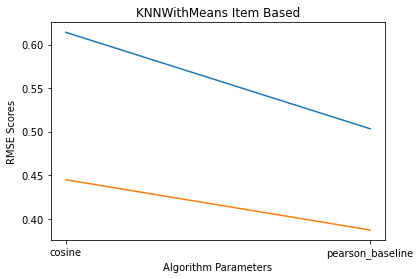

In [88]:
plt.plot(KNNWithMeans_algorithms_ItemBased_3Split, KNNWithMeans_RMSE_scores_ItemBased_3Split)
plt.plot(KNNWithMeans_algorithms_ItemBased_5Split, KNNWithMeans_RMSE_scores_ItemBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNWithMeans Item Based")
plt.savefig('./Images/KNNWithMeans_Item_Based.png')
plt.show()


### KNNBaseline UserBased

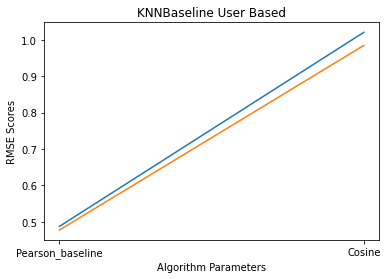

In [89]:
plt.plot(KNNwithBaseline_algorithms_UserBased_3Split, KNNwithBaseline_RMSE_scores_UserBased_3Split)
plt.plot(KNNBaseline_algorithms_UserBased_5Split, KNNBaseline_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBaseline User Based")
plt.savefig('./Images/KNNBaseline_User_Based.png')
plt.show()


### KNNBaseline ItemBased

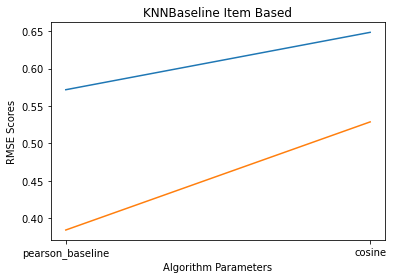

In [90]:
plt.plot(KNNBaseline_algorithms_ItemBased_3Split, KNNBaseline_RMSE_scores_ItemBased_3Split)
plt.plot(KNNBaseline_algorithms_ItemBased_5Split, KNNBaseline_RMSE_scores_ItemBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.title("KNNBaseline Item Based")
plt.savefig('./Images/KNNBaseline_Item_Based.png')
plt.show()


In [115]:
user_based_best_scores = {}
item_based_best_scores = {}

print("**** SCORES FOR KNN BASIC ****")
print("best_KNNBasic_RMSE_scores_UserBased_3Split",min(KNNBasic_RMSE_scores_UserBased_3Split))
print("best_KNNBasic_RMSE_scores_UserBased_5Split",min(KNNBasic_RMSE_scores_UserBased_5Split))
print("best_KNNBasic_RMSE_scores_ItemBased_3Split",min(KNNBasic_RMSE_scores_ItemBased_3Split))
print("best_KNNBasic_RMSE_scores_ItemBased_5Split",min(KNNBasic_RMSE_scores_ItemBased_5Split))

user_based_best_scores['KNNBasic'] = min (min(KNNBasic_RMSE_scores_UserBased_3Split), min(KNNBasic_RMSE_scores_UserBased_5Split))
item_based_best_scores['KNNBasic'] = min (min(KNNBasic_RMSE_scores_ItemBased_3Split), min(KNNBasic_RMSE_scores_ItemBased_5Split))

print("**** SCORES FOR KNN WITH MEANS **** ")
print("best_KNNwithMeans_RMSE_scores_UserBased_3Split",min(KNNwithMeans_RMSE_scores_UserBased_3Split))
print("best_KNNWithMeans_RMSE_scores_UserBased_5Split",min(KNNWithMeans_RMSE_scores_UserBased_5Split))
print("best_KNNWithMeans_RMSE_scores_ItemBased_3Split",min(KNNWithMeans_RMSE_scores_ItemBased_3Split))
print("best_KNNWithMeans_RMSE_scores_ItemBased_5Split",min(KNNWithMeans_RMSE_scores_ItemBased_5Split))

user_based_best_scores['KNNWithMeans'] = min (min(KNNwithMeans_RMSE_scores_UserBased_3Split), min(KNNWithMeans_RMSE_scores_UserBased_5Split))
item_based_best_scores['KNNWithMeans'] = min (min(KNNWithMeans_RMSE_scores_ItemBased_3Split), min(KNNWithMeans_RMSE_scores_ItemBased_5Split))

print("**** SCORES FOR KNN WITH MEANS **** ")
print("best_KNNwithBaseline_RMSE_scores_UserBased_3Split",min(KNNwithBaseline_RMSE_scores_UserBased_3Split))
print("best_KNNBaseline_RMSE_scores_UserBased_5Split",min(KNNBaseline_RMSE_scores_UserBased_5Split))
print("best_KNNBaseline_RMSE_scores_ItemBased_3Split",min(KNNBaseline_RMSE_scores_ItemBased_3Split))
print("best_KNNBaseline_RMSE_scores_ItemBased_5Split",min(KNNBaseline_RMSE_scores_ItemBased_5Split))

user_based_best_scores['KNNBaseline'] = min (min(KNNwithBaseline_RMSE_scores_UserBased_3Split), min(KNNBaseline_RMSE_scores_UserBased_5Split))
item_based_best_scores['KNNBaseline'] = min (min(KNNBaseline_RMSE_scores_ItemBased_3Split), min(KNNBaseline_RMSE_scores_ItemBased_5Split))



**** SCORES FOR KNN BASIC ****
best_KNNBasic_RMSE_scores_UserBased_3Split 0.6973582075531454
best_KNNBasic_RMSE_scores_UserBased_5Split 0.5506160547862633
best_KNNBasic_RMSE_scores_ItemBased_3Split 0.5948432863414794
best_KNNBasic_RMSE_scores_ItemBased_5Split 0.45580662755720847
**** SCORES FOR KNN WITH MEANS **** 
best_KNNwithMeans_RMSE_scores_UserBased_3Split 0.5810982970859652
best_KNNWithMeans_RMSE_scores_UserBased_5Split 0.49029542592320563
best_KNNWithMeans_RMSE_scores_ItemBased_3Split 0.5034438565905788
best_KNNWithMeans_RMSE_scores_ItemBased_5Split 0.3871309483481778
**** SCORES FOR KNN WITH MEANS **** 
best_KNNwithBaseline_RMSE_scores_UserBased_3Split 0.48752264176531446
best_KNNBaseline_RMSE_scores_UserBased_5Split 0.477578355810125
best_KNNBaseline_RMSE_scores_ItemBased_3Split 0.5717441046307216
best_KNNBaseline_RMSE_scores_ItemBased_5Split 0.38423059553137007


{'KNNBasic': 0.5506160547862633, 'KNNWithMeans': 0.49029542592320563, 'KNNBaseline': 0.477578355810125}


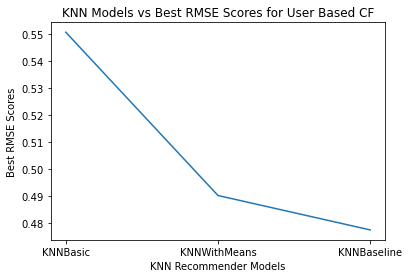

In [120]:
algorithms=["KNNBasic","KNNWithMeans", "KNNBaseline"]
user_based_best_RMSE_Scores=list(user_based_best_scores.values())
print(user_based_best_scores)
plt.plot(algorithms,user_based_best_RMSE_Scores)
plt.ylabel('Best RMSE Scores')
plt.xlabel('KNN Recommender Models')
plt.title("KNN Models vs Best RMSE Scores for User Based CF")
plt.savefig('./Images/KNN_Models_vs_Best_RMSE_Scores_for_User_Based_CF.png')
plt.show()

{'KNNBasic': 0.45580662755720847, 'KNNWithMeans': 0.3871309483481778, 'KNNBaseline': 0.38423059553137007}


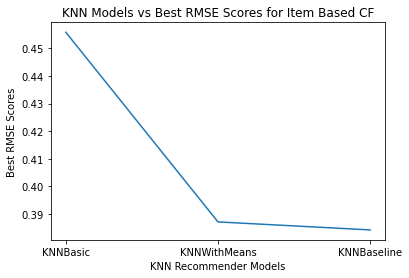

In [121]:
algorithms=["KNNBasic","KNNWithMeans", "KNNBaseline"]
item_based_best_RMSE_Scores=list(item_based_best_scores.values())
print(item_based_best_scores)
plt.plot(algorithms,item_based_best_RMSE_Scores)
plt.ylabel('Best RMSE Scores')
plt.xlabel('KNN Recommender Models')
plt.title("KNN Models vs Best RMSE Scores for Item Based CF")
plt.savefig('./Images/KNN_Models_vs_Best_RMSE_Scores_for_Item_Based_CF.png')
plt.show()

# Sentiment Based KNN

In [92]:
## Importing data
reviews = pd.read_csv('./Clean_data_files/California_reviews_c.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
users = pd.read_csv('./Clean_data_files/CA_users_c.csv', usecols= ['user_id', 'is_elite'])
sentiment_reviews = pd.read_csv('./Clean_data_files/sentiment_reviews_CA.csv', usecols= ['review_id', 'sentiment'])

## Elite Reviews Only

In [93]:
intersected_df = reviews.merge(sentiment_reviews, how='left', on=['review_id'], indicator=True)

# intersected_df.loc[intersected_df['_merge'] == 'left_only', 'stars'] = 0


intersected_df.head(100)

sentiment_filtered_review_df = intersected_df.loc[intersected_df['_merge'] == 'both']
sentiment_filtered_review_df.head(5)

,review_id,user_id,business_id,stars,sentiment,_merge
287,LdwSM046ak1h_J-gdx369Q,RoLBC1TRl20alCKsODc0Yw,CkENBnSJFfPA1hY0qrqfCg,4,0.339158,both
288,LdwSM046ak1h_J-gdx369Q,RoLBC1TRl20alCKsODc0Yw,CkENBnSJFfPA1hY0qrqfCg,4,0.339158,both
301,kXq4fryYo4AOe0Ned-UvXw,PZOf15ZMAjmvRTRe2p7W1Q,sXaIwcg_nV79tPMenha6hw,3,0.220238,both
302,kXq4fryYo4AOe0Ned-UvXw,PZOf15ZMAjmvRTRe2p7W1Q,sXaIwcg_nV79tPMenha6hw,3,0.220238,both
372,o0NczL6xqViXsGEzCcNE1Q,CdULqOueyPJo5NDnbU_nZw,ZY4M_fKW8aSUpsUzeh5fuA,3,0.217071,both


In [94]:
sentiment_filtered_review_df.shape

(770, 6)

In [95]:
intersected_df.shape

(37426, 6)

In [96]:
elite_reviews_df = sentiment_filtered_review_df.merge(users, how='left', on=['user_id'])
elite_reviews_df.shape

(1540, 7)

In [97]:
elite_reviews_df.loc[elite_reviews_df['is_elite'] == True].shape

(1540, 7)

In [98]:
elite_reviews_df = elite_reviews_df.loc[elite_reviews_df['is_elite'] == True]
elite_reviews_df.shape

(1540, 7)

In [99]:
len(elite_reviews_df.business_id.unique())

123

In [100]:
len(elite_reviews_df.user_id.unique())

366

In [101]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, business id and stars (in that order).
data = Dataset.load_from_df(elite_reviews_df[['user_id', 'business_id', 'stars']], reader)

## Best Parameters using Grid Search

### Grid Search with KNNBasic

In [122]:
from surprise.model_selection import GridSearchCV

In [125]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [126]:
from surprise import KNNBasic
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=10)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

### Grid Search with KNNWithMeans

In [127]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [128]:
from surprise import KNNWithMeans
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Don

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Comput

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing 

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity

### Grid Search with KNNBaseline

In [129]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [130]:
from surprise import KNNBaseline
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the c

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Est

Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Comput

Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Comput

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine 

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matr

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matr

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done co

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matr

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine sim

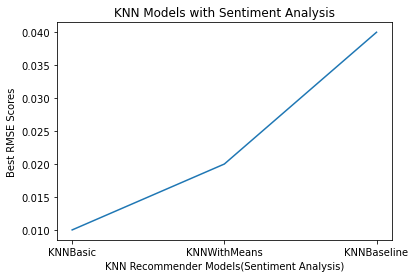

<Figure size 432x288 with 0 Axes>

In [131]:
import matplotlib.pyplot as plt
algorithms=["KNNBasic","KNNWithMeans", "KNNBaseline"]
RMSE_Scores=[0.01,0.02,0.04]
plt.plot(algorithms,RMSE_Scores)
plt.ylabel('Best RMSE Scores')
plt.xlabel('KNN Recommender Models(Sentiment Analysis)')
plt.title("KNN Models with Sentiment Analysis")
plt.savefig('KNN_Recommender_Models_sentiment_analysis.png')
plt.show()
plt.savefig("./Images/KNN_Model_With_Sentiment_Analysis.png")